 # VISUALIZACIÓN
 

## IMPORTACIONES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import regex as re


In [2]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/Trabajos IH/W3


In [3]:
ascensos_final = pd.read_csv("Data/ascensos_everest_final.csv")

In [4]:
table1 = pd.read_csv("Data/table1.csv")

In [5]:
table2 = pd.read_csv("Data/table2.csv")

In [6]:
table3 = pd.read_csv("Data/table3.csv")

## PEQUEÑOS DATAFRAMES DEL DATAFRAME ORIGINAL

In [7]:
ascensos_final.head(1)

,Unnamed: 0,Peak,Name,Citizenship,Sex,Age,Oxy,Dth,Host,Year,Season,Month,Day,Time
0,0,EVER,Tenzing Norgay,India,M,39.0,Yes,No,Nepal,1953,Spr,May,29,11:30


In [8]:
df_citizenship_común = ascensos_final[ascensos_final['Citizenship'].map(ascensos_final['Citizenship'].value_counts()) > 75]
#Dataframe incluyendo solo las nacionalidades mas frecuentes.

In [9]:
df_citizenship_común1 = ascensos_final[ascensos_final["Citizenship"] != "Nepal"]
#Dataframe icluyendo las nacionalidades mas frecuentes y excluyendo Nepal.

In [10]:
df_no_may = ascensos_final[ascensos_final["Month"] != "May"]
#Dataframe excluyendo Mayo

In [11]:
df_no_oxígeno = ascensos_final[ascensos_final["Oxy"] != "Yes"]
#Dataframe excluyendo el uso de oxígeno

In [12]:
df_Time_común = ascensos_final[ascensos_final['Time'].map(ascensos_final['Time'].value_counts()) > 25]
#Dataframe incluyendo las horas de llegada mas comunes

In [13]:
df_Time_común1 = df_Time_común.sort_values(by="Time", ascending=True)
#Dataframe incluyendo las horas de llegada mas comunes en orden ascendente

In [14]:
df_muertes = ascensos_final[ascensos_final["Dth"] != "No"]
#Dataframe de los muertos que hayan hecho cima en en everest

In [15]:
df_mejores_alpinistas = ascensos_final[ascensos_final['Name'].map(ascensos_final['Name'].value_counts()) > 20]
#Incluye los alpinistas que han subido mas de 20 veces el everest (Sherpas)

## DISPLAY DE LOS  GRÀFICOS

In [16]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (14.,8.)})
sns.set_style("whitegrid")

## DISTRIBUCIONES 

<AxesSubplot:ylabel='Name'>

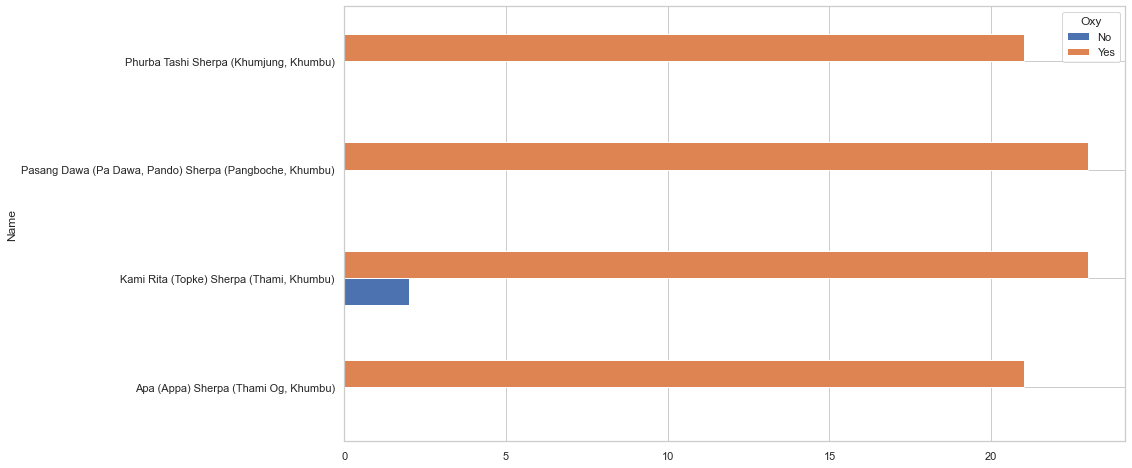

In [17]:
df_mejores_alpinistas.groupby(["Name", "Oxy"])["Oxy"].count().unstack().plot(kind="barh")

### MUERTES

In [18]:
Datos1 = ascensos_final["Dth"].value_counts()

Text(0.5, 1.0, 'Death Rate')

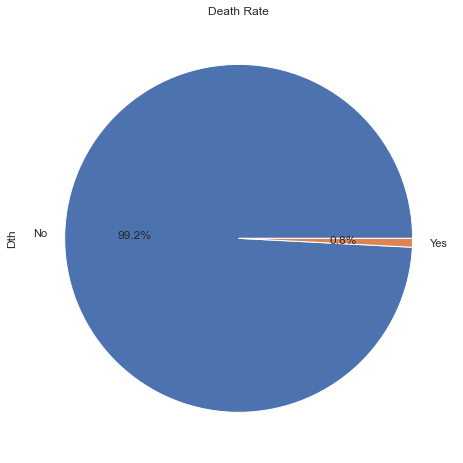

In [19]:
Datos1.plot.pie(autopct="%.1f%%")
plt.title('Death Rate')

Text(0.5, 1.0, 'Total Deaths')

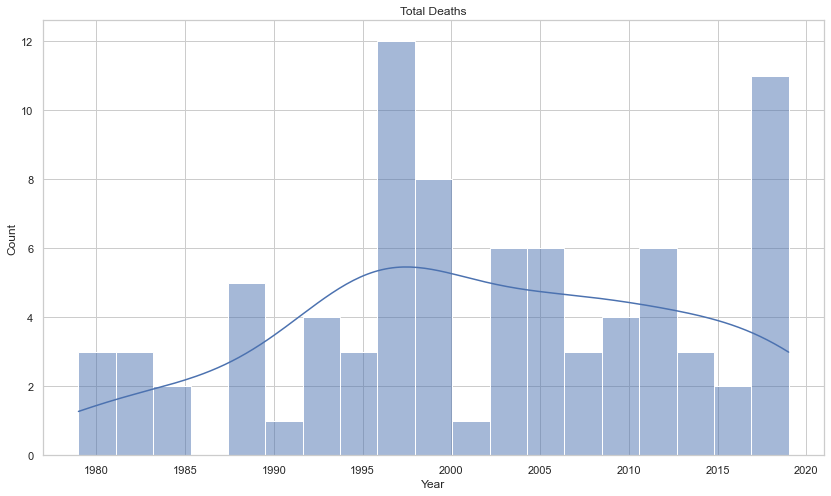

In [20]:
sns.histplot(x=df_muertes.Year, bins=19, kde=True)
plt.title('Total Deaths')

### DISTRIBUCIÓN DE ALPINISTAS POR EDAD

Text(0.5, 1.0, 'Age Distribution')

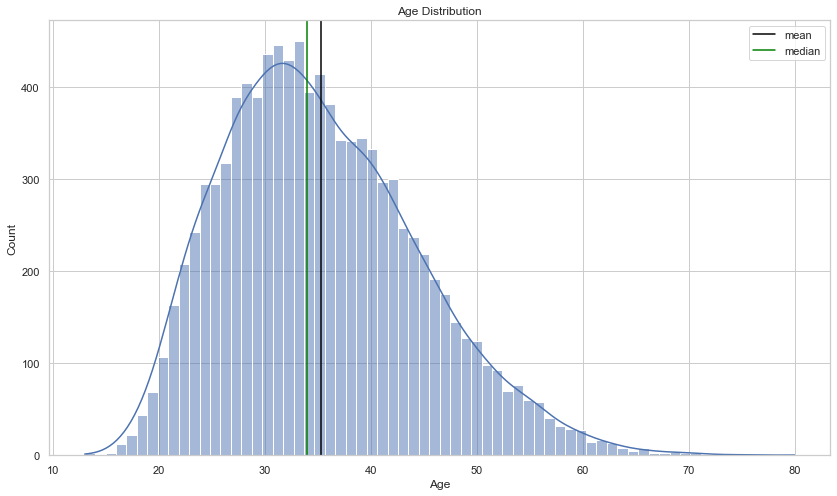

In [21]:
graf = sns.histplot(x=ascensos_final.Age, kde=True, bins = 68)
graf.axvline(x=ascensos_final.Age.dropna().mean(), c="black", label="mean")
graf.axvline(x=ascensos_final.Age.dropna().median(), c="green", label="median")
plt.legend()
plt.title('Age Distribution')

### USO DE OXÍGENO

In [22]:
Datos = ascensos_final["Oxy"].value_counts()

Text(0.5, 1.0, 'Oxygen Use')

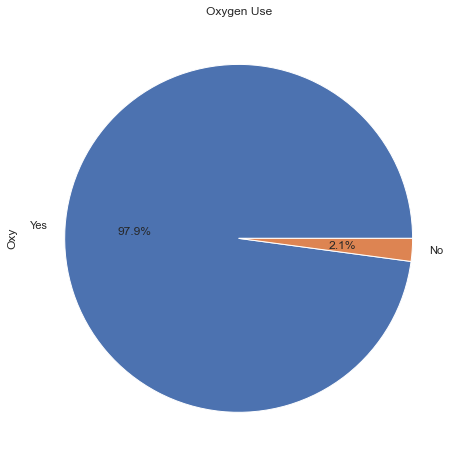

In [23]:
Datos.plot.pie(autopct="%.1f%%")
plt.title('Oxygen Use')

Text(0.5, 1.0, 'Year Expeditions with/without Oxygen')

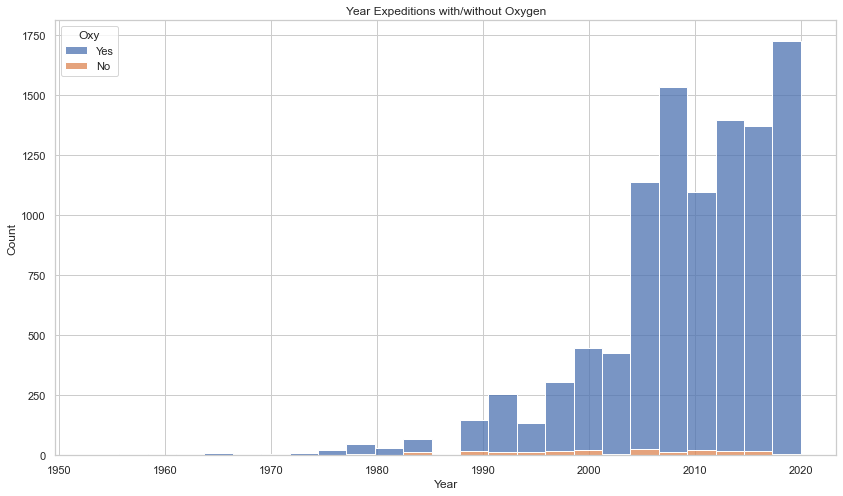

In [24]:
sns.histplot(data=ascensos_final, x="Year", hue="Oxy", multiple="stack", bins=25)
plt.title('Year Expeditions with/without Oxygen')

Text(0.5, 1.0, 'No Oxygen Rises')

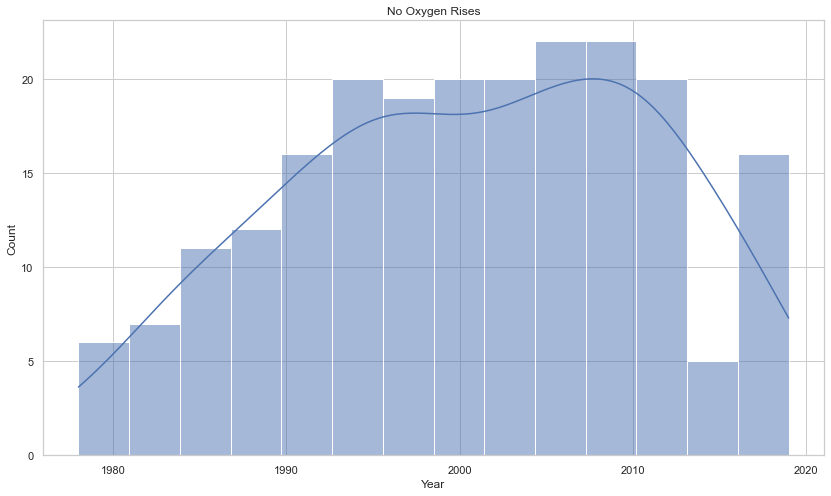

In [25]:
sns.histplot(data=df_no_oxígeno, x="Year", bins=14, kde=True)
plt.title('No Oxygen Rises')

### COMPARACIÓN EDAD CON MUERTE/GÉNERO

<AxesSubplot:xlabel='Sex', ylabel='Age'>

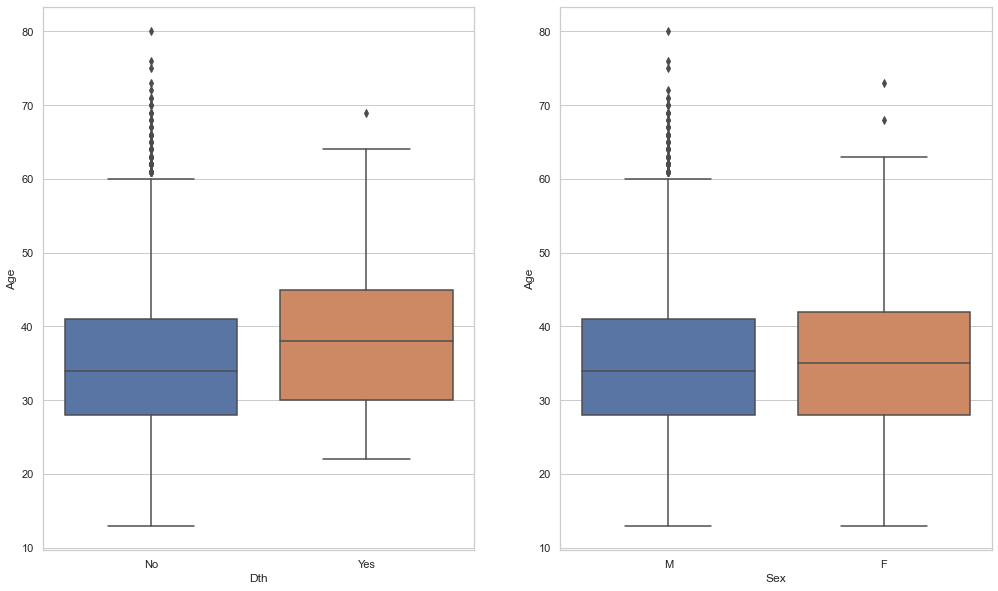

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,10))
sns.boxplot(x="Dth", y="Age", data=ascensos_final, ax=ax[0])
sns.boxplot(x="Sex", y="Age", data=ascensos_final, ax=ax[1])

### DDISTRIBUCIÓN POR MES

In [27]:
Datos1 = ascensos_final["Month"].value_counts()

In [28]:
Datos1

May    9673
Oct     241
Jun     152
Apr      48
Sep      46
Dec      13
Aug       9
Feb       2
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Count'>

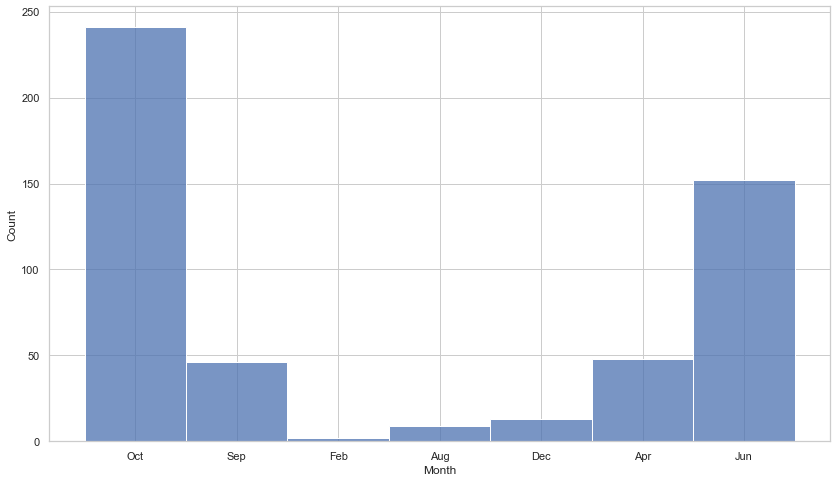

In [29]:
sns.histplot(x=df_no_may.Month)
#Excluyendo Mayo (Fuera de rango)

### HORA PARA HACER CIMA

Text(0.5, 1.0, 'Reaching Hours')

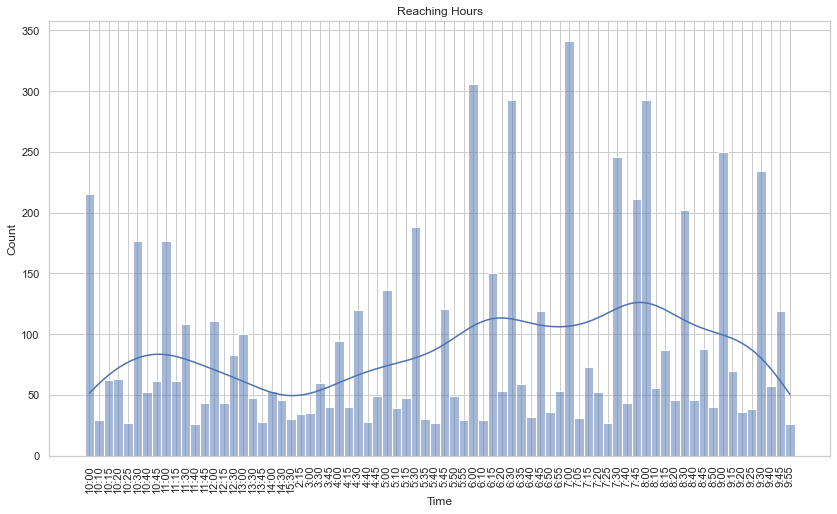

In [30]:
sns.histplot(data=df_Time_común1, x="Time", multiple="stack", kde=True)
plt.xticks(rotation=90);
plt.title('Reaching Hours')

### ALPINISTAS POR PAÍS DE ORIGEN

Text(0.5, 1.0, 'Summits')

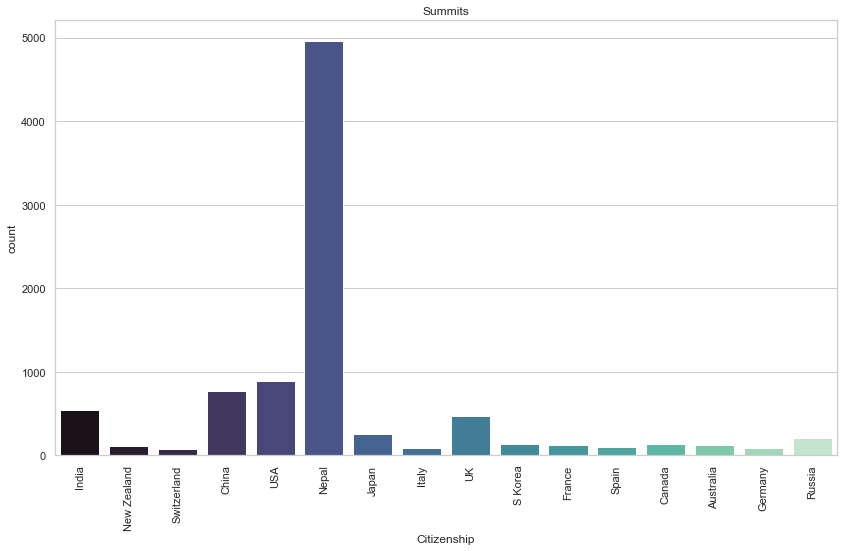

In [31]:
sns.countplot(x=df_citizenship_común.Citizenship, palette="mako")
plt.xticks(rotation=90);
plt.title('Summits')


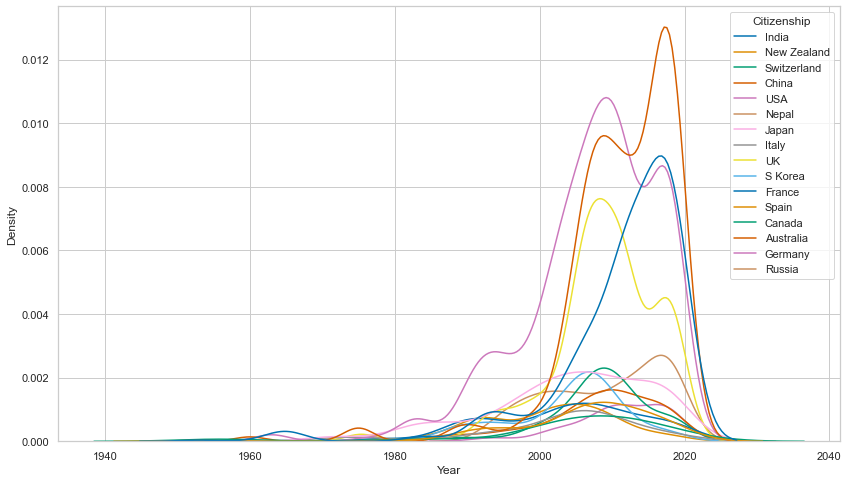

In [32]:
sns.kdeplot(x=df_citizenship_común1.Year, hue=df_citizenship_común.Citizenship, warn_singular=False, palette="colorblind");
# Excluyendo Nepal (Fuera de rango)

### ACCESO A LA CIMA

Text(0.5, 1.0, 'Entry to Everest')

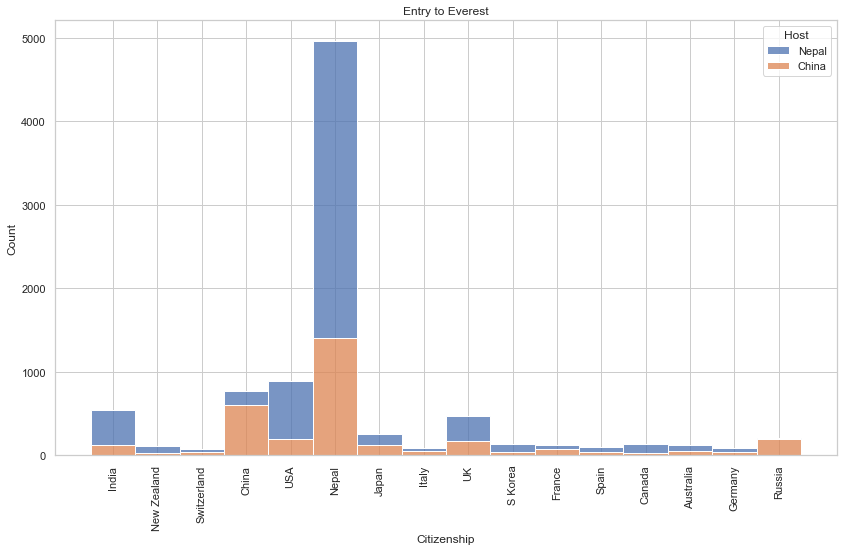

In [33]:
sns.histplot(data=df_citizenship_común, x="Citizenship", hue="Host", multiple="stack")
plt.xticks(rotation=90);
plt.title('Entry to Everest')


## DISTRIBUCIÓN UTILIZANDO WEB-SCRAPING

### CREAER SUBDATAFRAMES

In [34]:
df_grouped1 = df_muertes[["Citizenship", "Dth"]]

In [35]:
df_grouped2 = df_grouped1.reset_index()

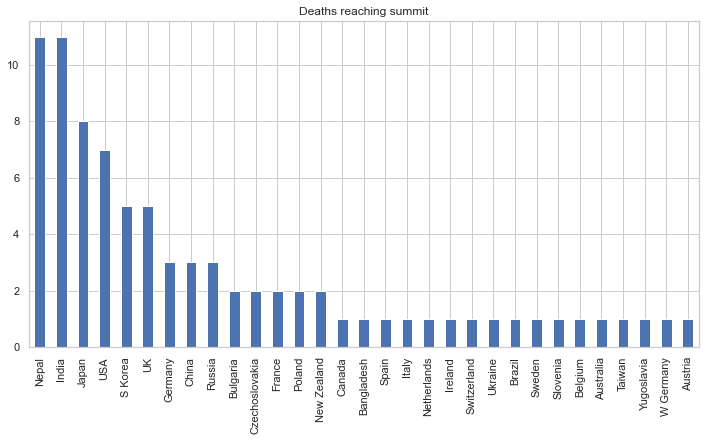

In [36]:
df_grouped2["Citizenship"].value_counts().plot(kind="bar",
                                        figsize=(12,6),
                                        title="Deaths reaching summit")
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Deaths on Everest')

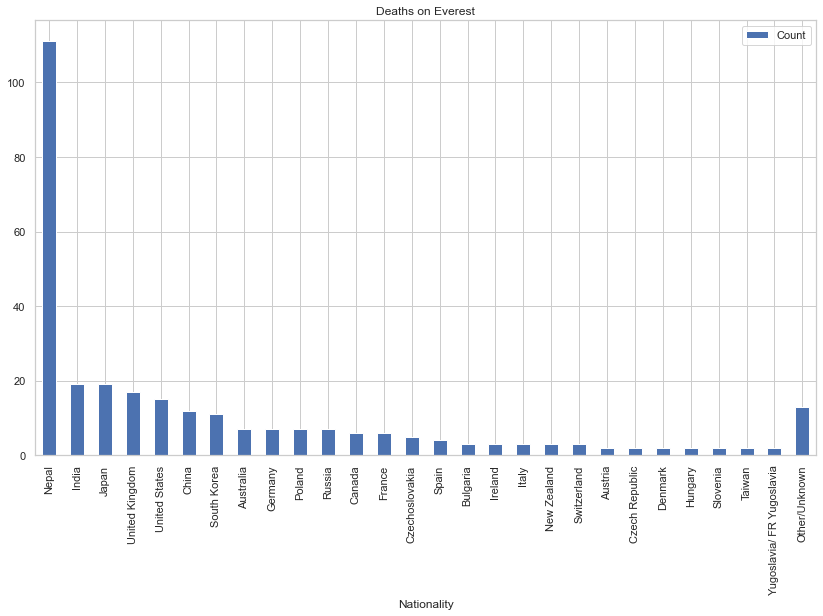

In [37]:
ax = table2.plot.bar(x='Nationality', y='Count', rot=90)
plt.title('Deaths on Everest')

In [38]:
x = len(df_muertes)/sum(table2.Count)

In [39]:
x

0.28135593220338984

In [40]:
porcentage_muertes = (df_muertes["Dth"].value_counts()/sum(table2.Count))

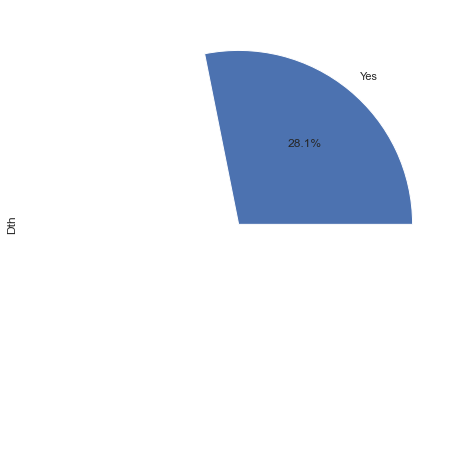

In [43]:
porcentage_muertes.plot.pie(autopct="%.1f%%")
normalize=True

Text(0.5, 1.0, 'Death Cause')

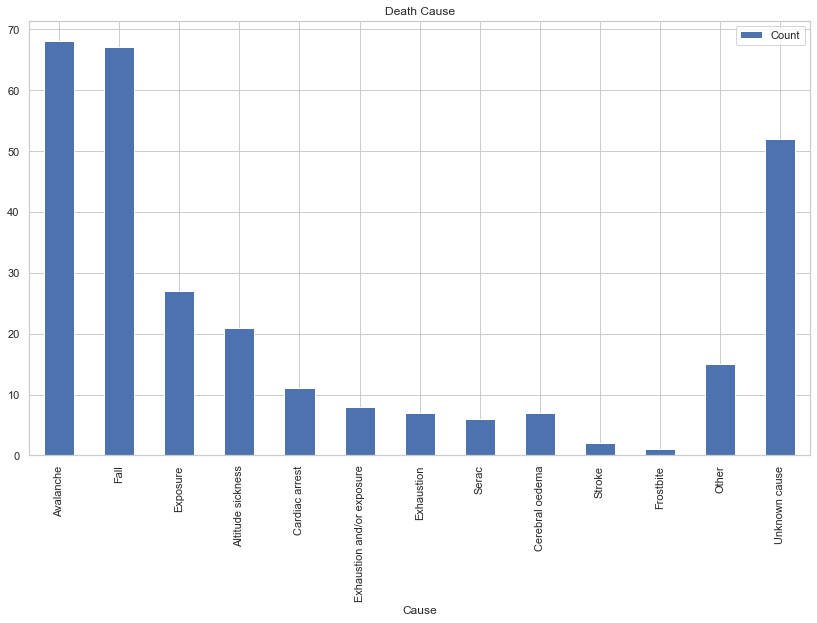

In [42]:
table3.plot.bar(x='Cause', y='Count', rot=90)
plt.title('Death Cause')